# Regression

In this notebook I talk about *Regression*. *Regression* is a statistical technique to understand the relationship between independent and *dependent* variables. 

There are different types of *Regression* such as:

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial and Spline Regression
* Nonlinear Regression

Let's start with *Simple Linear Regression*

### Simple Linear Regression (SLR)
When the relationship between the dependent and an independent variable is linear this concept comes into the play. This relationship can be expressed as:

$Y$ = $\beta_0$ + $\beta_1$.$X$
where $X$ is the independent variable and $Y$ is the dependent one. The $\beta_0$ is the intercept and $\beta_1$ is the slope or *Regression coeifficient*. Any $Y_i$ from the fit is the *Fitted value* and the dffierene between the real value and $Y_i$ is *residual*. The one of the methods of fitting is to minimize the *Least square* error. The *Least square* error is the sum of squared errors of the fit. 

Now let's work on the *SLR*:

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# here :
#    y = 1*X_0 + 2*X_1 + 20
y = np.dot(X, np.array([1,2])) + 20

reg = LinearRegression().fit(X, y)

print('The intercept is: ', reg.intercept_)
print('The slope is: ', reg.coef_)

The intercept is:  20.0
The slope is:  [1. 2.]


Let's do prediction:

In [2]:
reg.predict(np.array([[3,4]]))

array([31.])

In [3]:
reg.predict(X)

array([23., 25., 26., 28.])

### Multiple Linear Regression (MLR)
In this case there are multiple independent variables.

$Y$ = $\beta_0$ + $\beta_1$.$X_1$ + $\beta_2$.$X_2$ + .... + $\beta_n$.$X_n$ + $\epsilon$

The goal is to create a linear relationship between $X_i$ and $Y$. In the equation above the $\epsilon$ is the model's error term.

To work on the *MLR*, I use the dataset below:

In [4]:
import pandas as pd

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
 
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

In [5]:
df.head(5)

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


Let's choose the independet varialbels and the dependent variable for our modeling purpose.


In [6]:
X = df[['Interest_Rate','Unemployment_Rate']].values
Y = df[['Stock_Index_Price']].values

so we have this relationship between $Y$ and $X_i$

$Y$ = $\beta_0$ + $\beta_1$.$X_{InterestRate}$ + $\beta_2$.$X_{UnemploymentRate}$ + $\epsilon$

In [7]:
reg = LinearRegression().fit(X, Y)

In [8]:
print('The intercept is: ', reg.intercept_)
print('The slope is: ', reg.coef_)

The intercept is:  [1798.40397763]
The slope is:  [[ 345.54008701 -250.14657137]]


therefore the fit parameters are:

$\beta_0$ = 1798.40

$\beta_1$ = 345.54

$\beta_2$ = -250.15

Let's do prediction

In [11]:
X_interest = 3
X_unemployment_rate = 5

print('prediction for the intereste: ',X_interest,' and Unemployment rate: ', X_unemployment_rate,' is ',reg.predict([[X_interest ,X_unemployment_rate]])[0][0] )

prediction for the intereste:  3  and Unemployment rate:  5  is  1584.291381810649


In [12]:
import statsmodels.api as sm

What about the statistical values of the model

In [13]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.04e-11
Time:                        20:05:53   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1798.4040    899.248      2.000      0.0

### Weighted Regression

This models is used when different observations measured with different precisions. If one observation has higher variance it gets a lower weight. 

In [14]:
from sklearn import datasets


california = datasets.fetch_california_housing()

print("The feature names of the dataset are:\n",california.feature_names)
print("\nThe target name of the dataset is:\n",california.target_names)

df_calif_data = pd.DataFrame(california.data)
df_calif_target = pd.DataFrame(california.target)

df_calif_data = df_calif_data.rename(columns={0:'MedInc', 1:'HouseAge', 2:'AveRooms', 3:'AveBedrms', 4:'Population',
                                 5:'AveOccup',6:'Latitude', 7:'Longitude'})

df_calif_target = df_calif_target.rename(columns={0:"MedHouseVal"})

df_data = pd.concat([df_calif_data, df_calif_target],axis=1)

print('\nHere is the dataframe of the dataset:\n')
df_data

The feature names of the dataset are:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

The target name of the dataset is:
 ['MedHouseVal']

Here is the dataframe of the dataset:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
import statsmodels.api as sm

In [14]:
Y=df_data['MedHouseVal']
X=df_data.drop(['MedHouseVal'], axis=1)

In [15]:
wls_model = sm.WLS(Y,X)
results = wls_model.fit()
print(results.summary())

                                 WLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.892
Model:                            WLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                        0.00
Time:                        10:16:25   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Logistic Regression
This models is used to predict the probability of binary classes such as heads/tails, loose/win and spam/not spam etc. This method is also used in multiclass calssification.

In [18]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

Let's load the dataset here:

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

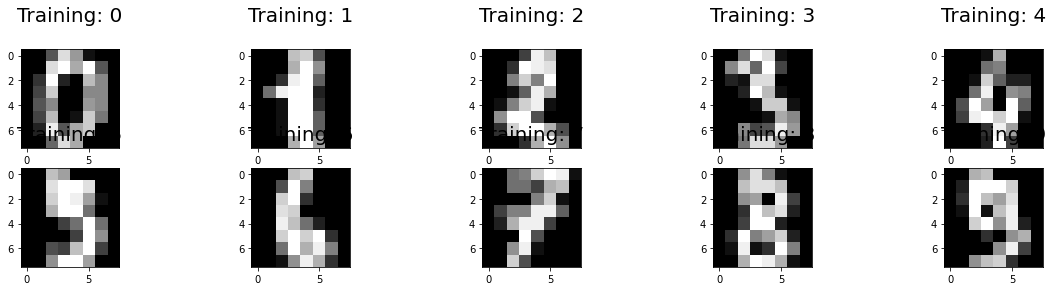

In [18]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(2, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=10)

In [20]:
LR = LogisticRegression(solver='liblinear', max_iter=100)
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

Now let's make predictions:

In [21]:
predictions = LR.predict(x_test)
predictions

array([5, 2, 5, 4, 1, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
       6, 7, 8, 8, 5, 2, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 8, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 8, 5, 2, 3, 3, 8, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 1, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 8, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 4, 5, 6, 1, 8, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 1, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [22]:
score = LR.score(x_test, y_test)
print('The score is: ', score*100, '%')

The score is:  95.83333333333334 %


Let's print out the confusion matrix:

In [23]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  2  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0  0  0]
 [ 0  2  0  0 31  0  0  0  1  0]
 [ 0  1  0  0  0 31  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  1  0  0 39  0  0]
 [ 0  2  1  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  1  0  0  3 35]]


### Polynomial Regression

In this kind of regression the relationship between the dependent and an independent variable is as *n*th degree of freedom.

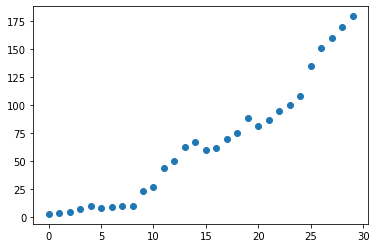

In [24]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

plt.plot(x,y,'o')

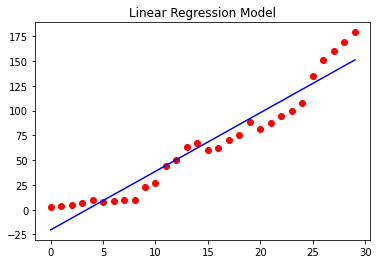

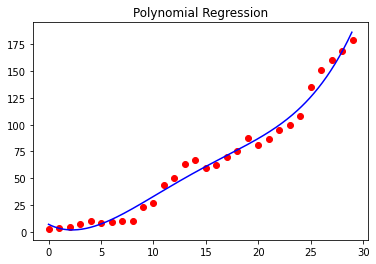

In [25]:
# fitting the linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1,1),y)
 
# visualising the linear regression model
plt.scatter(x,y, color='red')
plt.plot(x, lin_reg.predict(x.reshape(-1,1)),color='blue')
plt.title("Linear Regression Model")
plt.show()
 
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x.reshape(-1,1))
  
# prints X_poly
 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(x),max(x),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(x,y, color='red') 
  
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
  
plt.title("Polynomial Regression")
plt.show()

### Bayesian Linear Regression
This kind of regression is based on linear regression. In linear regression the equation is expressed as:

$Y$ = $\beta_0$ + $\beta_1$.$X$ 

where $X$ is the independent variable and $Y$ is the dependent one (*response value*). The $\beta_0$ is the intercept and $\beta_1$ is the slope or *Regression coeifficient*. In Bayesian the $Y$ is not a estimated based on a single value in compared with linear regression but it is calculated from probability distribution. To find out more about the fitting process on a fake data, I use the available tutorial in the [sklearn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html) page here:

In [27]:
# import the library
from sklearn.linear_model import BayesianRidge, LinearRegression
from scipy import stats

# create a fake dataset with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features) 

# we can define the weights precision with lambda_
lambda_ = 3.0
w = np.zeros(n_features)

# how many weights of interest should we consider? we can add 10 weights
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(lambda_))
    
# we can add noise with precision alpha of 40?
alpha_ = 40.0
noise = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

Now I want to compare the results of Bayesian regression and the linear regression:

In [29]:
# let's fit two models linear regression and Bayesian regression
# to compare both results
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

Now I plot the histogram of weights and OLS estimate:

Text(0.5, 0, 'Iterations')

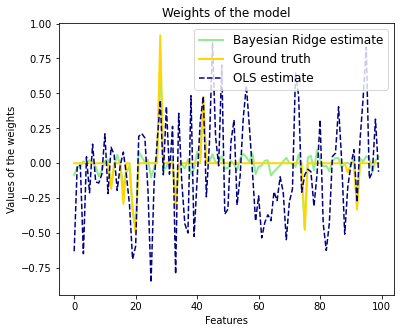

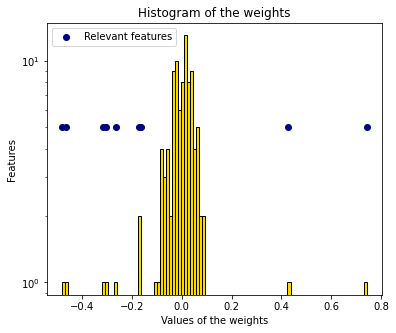

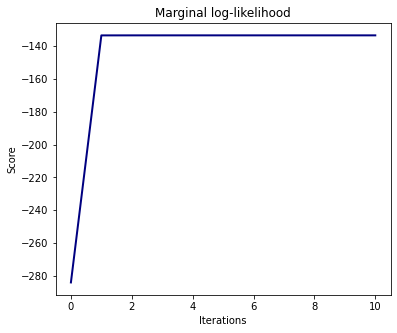

In [34]:
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color="lightgreen", linewidth=lw, label="Bayesian Ridge estimate")
plt.plot(w, color="gold", linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color="gold", log=True, edgecolor="black")
plt.scatter(
    clf.coef_[relevant_features],
    np.full(len(relevant_features), 5.0),
    color="navy",
    label="Relevant features",
)
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color="navy", linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

Below the *Bayesian regression* is used to fit the the polynomial data:

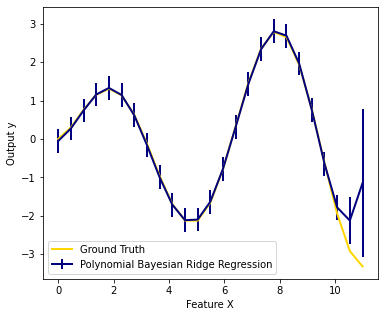

In [33]:
# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(
    X_plot,
    y_mean,
    y_std,
    color="navy",
    label="Polynomial Bayesian Ridge Regression",
    linewidth=lw,
)
plt.plot(X_plot, y_plot, color="gold", linewidth=lw, label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

### Lasso Regression

The *Lasso regression* uses the linear regression concept with the usage of *shrinkage* where the data values are shrunk towards a central point. 

In [36]:
from sklearn import linear_model

# the alpha = 0 means that the fit equals to ordinary least square. 
clf = linear_model.Lasso(alpha=0.1)

clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

Lasso(alpha=0.1)

### Ridge Regression

With this method of *Regression* we can estimate the coefficients where linearly independent variables are highly correlated. The loss function is the linear least squares function. 

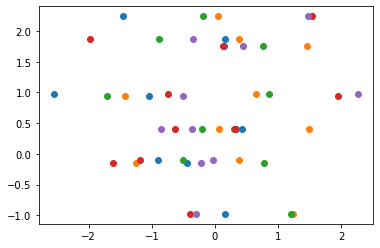

In [9]:
from sklearn.linear_model import Ridge
import numpy as np

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
plt.plot(X,y,'o')
plt.show()

In [11]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

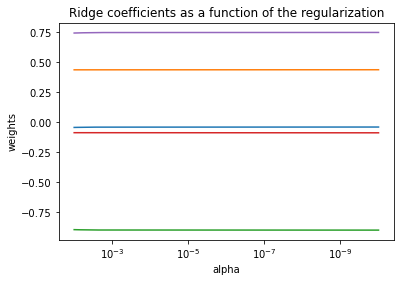

In [12]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()


In *Ridge Regression* analysis there are a couple of hyper-parameters which we can tune them. First I present the effect of $\alpha$ parameter on the quality of the fit:

In [77]:
x, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data 

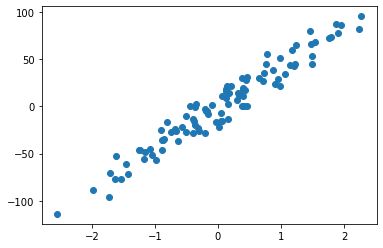

In [78]:
plt.plot(x, y, 'o')

Let's work on the fit:

In [79]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10)

ridge_fit = Ridge(alpha= 5.0).fit(X_train, y_train)

In [80]:
print('intercept: {}'.format(ridge_fit.intercept_))
print('coeff:{}'.format(ridge_fit.coef_[0]))
print('R-squared score (training): {:.3f}'
     .format(ridge_fit.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(ridge_fit.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(ridge_fit.coef_ != 0)))

intercept: -1.0239187368602118
coeff:41.02000651883183
R-squared score (training): 0.940
R-squared score (test): 0.941
Number of non-zero features: 1


Let's tune the $\alpha$ parameter

In [91]:
alpha_list = [0, 0.001, 0.01, 0.5, 1, 3, 5, 10, 200, 5000]

r_squared_test_list =[]

for i in alpha_list:
    r_squared_train = 0
    r_squared_test = 0
    clf_ridge = Ridge(alpha = i).fit(X_train, y_train)
    r_squared_train = clf_ridge.score(X_train, y_train)
    r_squared_test = clf_ridge.score(X_test, y_test)
    r_squared_test_list.append(r_squared_test)
    print('Aplpha = ',i,'\nR^2 for train', r_squared_train,
         'R^2 for test', r_squared_test)

Aplpha =  0 
R^2 for train 0.9432134979695842 R^2 for test 0.9308500333645752
Aplpha =  0.001 
R^2 for train 0.943213497805109 R^2 for test 0.9308531915056268
Aplpha =  0.01 
R^2 for train 0.9432134815259734 R^2 for test 0.9308815918834934
Aplpha =  0.5 
R^2 for train 0.9431729157575302 R^2 for test 0.932366390097529
Aplpha =  1 
R^2 for train 0.9430532779038083 R^2 for test 0.9337600620004659
Aplpha =  3 
R^2 for train 0.9418438518821655 R^2 for test 0.938192875747509
Aplpha =  5 
R^2 for train 0.9395951064417252 R^2 for test 0.9409844573858036
Aplpha =  10 
R^2 for train 0.9303790338757283 R^2 for test 0.9421517164880155
Aplpha =  200 
R^2 for train 0.44694999691747495 R^2 for test 0.4625503677605788
Aplpha =  5000 
R^2 for train 0.0279343769406738 R^2 for test -0.01721673522752787


(0.0, 200.0)

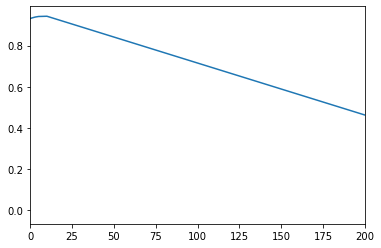

In [95]:
plt.plot(alpha_list, r_squared_test_list)
plt.xlim(0,200)

It looks the best $\alpha$ value is the one clsoe to zero value. Next, let's scale the data:

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
alpha_list = [0,0.0002, 0.5, 1, 3, 5, 10, 200, 1000]

for i in alpha_list:
    r_squared_train = 0
    r_squared_test = 0
    clf_ridge = Ridge(alpha = i).fit(X_train_scaled, y_train)
    r_squared_train = clf_ridge.score(X_train_scaled, y_train)
    r_squared_test = clf_ridge.score(X_test_scaled, y_test)
    print('Aplpha = ',i,'\nR^2 for train', r_squared_train,
         'R^2 for test', r_squared_test)

Aplpha =  0 
R^2 for train 0.9432134979695842 R^2 for test 0.9308500333645752
Aplpha =  0.0002 
R^2 for train 0.9432134953924985 R^2 for test 0.9308625319020596
Aplpha =  0.5 
R^2 for train 0.9306134605001732 R^2 for test 0.9421989120065539
Aplpha =  1 
R^2 for train 0.9027157608954031 R^2 for test 0.9280362290592897
Aplpha =  3 
R^2 for train 0.7610267912213343 R^2 for test 0.800355366799541
Aplpha =  5 
R^2 for train 0.6405084622328269 R^2 for test 0.6748746220764092
Aplpha =  10 
R^2 for train 0.4497951544177541 R^2 for test 0.4657318033390747
Aplpha =  200 
R^2 for train 0.035077845900096105 R^2 for test -0.008899751949532408
Aplpha =  1000 
R^2 for train 0.0071763067504418965 R^2 for test -0.041405110647681376


(0.0, 200.0)

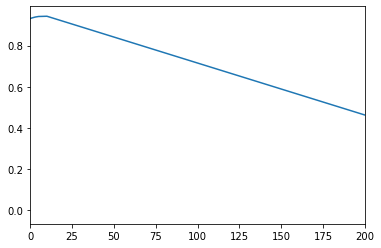

In [96]:
plt.plot(alpha_list, r_squared_test_list)
plt.xlim(0,200)